In [1]:
import sys
sys.path.insert(0, "/home/fcdl/Develop/ICL/")
from data.iCIFAR import ICIFAR
from torchvision.transforms import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
from data.common import DatasetPrototypes


In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(ICIFAR.MEAN, ICIFAR.STD)])

augmentation = transforms.RandomCrop((32,32), padding=4)

data = ICIFAR('/home/fcdl/dataset', num_cl_first=5, num_cl_after=5, 
              augmentation=None, transform=transform, batch_size=64, run_number=0, workers=8)
#data.order

Files already downloaded and verified
Files already downloaded and verified


In [11]:
# Show example image
data.train_dataset[0][0].show()

---------------Same order!
tensor([[[ 1.8426,  1.8426,  1.8426,  ...,  0.9630,  1.2122,  0.7724],
         [ 1.8426,  1.8280,  1.8280,  ...,  0.5965,  0.4646,  0.2447],
         [ 1.8426,  1.8280,  1.8426,  ...,  0.8751,  0.5379, -0.1218],
         ...,
         [ 0.2740,  0.1860,  0.1567,  ..., -1.4559, -0.9428, -0.7815],
         [-0.1072, -0.1365, -0.0485,  ..., -1.5732, -0.4737,  0.1714],
         [-0.6203, -0.6056, -0.4150,  ..., -1.3973, -0.3564,  0.1274]],

        [[ 2.0012,  2.0012,  2.0012,  ...,  1.2367,  1.5272,  1.0686],
         [ 2.0012,  1.9859,  1.9859,  ...,  0.7934,  0.6710,  0.4570],
         [ 2.0012,  1.9859,  2.0012,  ...,  1.1450,  0.8239,  0.1359],
         ...,
         [ 0.9310,  0.8851,  0.8392,  ..., -1.6376, -0.9496, -0.7202],
         [ 0.5029,  0.4723,  0.5487,  ..., -1.6528, -0.1851,  0.5640],
         [-0.0322, -0.0322,  0.1512,  ..., -1.3471,  0.1359,  0.7475]],

        [[ 2.0254,  2.0254,  2.0254,  ...,  1.1447,  1.3010,  0.7755],
         [ 2.0254,

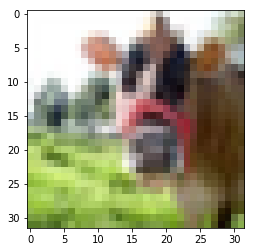

In [18]:
# Check if get dataloader returns the same images and in the same order as get images
# And, moreover, that images are returned as tensor not normalized or augmented
# That dataloader and prototypes are normalized in the same way

proto = data.get_images_of_class(19)
proto_y = torch.ones(len(proto))*19

proto_set = DatasetPrototypes(proto, proto_y, transform) # same as applying the target transform to proto

dl = data.get_dataloader_of_class(19)
# reconstruct the list of images from dataloader
ll = []
for img, tar in dl:
    ll.append(img)

images = torch.cat(ll)

flag = True
for i in range(500):
    if not torch.all(torch.eq(images[i], proto_set[i][0])):
        flag = False
        
if flag:
    print("---------------Same order!")
else:
    print("---------------Not same order")

npimg = proto[0].numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
print(proto_set[0][0])
print(images[0])

In [13]:
# check if dataloader of training works
# call next iteration 1st time should return classes [19, 40, 47, 67, 74]
# call next iteration 2nd time should return classes [13, 21, 24, 27, 87]
# call next iteration 3nd time should return classes [ 6, 23, 57, 75, 88]

data_loader = data.next_iteration()

count = 0
first = True
for inp, target in data_loader:
    count += inp.shape[0]
    if first:
        print(target.unique().sort()[0])
        first = False

assert count == 2500, "Not all samples are returned"

tensor([13, 21, 24, 27, 87])


In [12]:
# check if dataloader of training works
# call next iteration 1st time should return classes [19, 40, 47, 67, 74] + 3, 4
# call next iteration 2nd time should return classes [13, 21, 24, 27, 87] + 3, 4
# call next iteration 3nd time should return classes [ 6, 23, 57, 75, 88] + 3, 4

data.reset_iteration()

proto_x = []
proto_y = []

proto_x.append(data.get_images_of_class(3))
proto_y.append(torch.ones(500)*3)

proto_x.append(data.get_images_of_class(4))
proto_y.append(torch.ones(500)*4)

proto_x = torch.cat(proto_x)
proto_y = torch.cat(proto_y)

data_loader = data.next_iteration(proto_x, proto_y)

count = 0
first = True
for inp, target in data_loader:
    count += inp.shape[0]
    if first:
        print(target.unique().sort()[0])
        first = False

assert count == 3500, "Not all samples are returned"

tensor([ 3,  4, 19, 40, 47, 67, 74])


In [36]:
# check if dataloader of validation works

iteration=3
dl = data.test_dataloader(iteration=iteration-1)

x = [19, 47, 74, 40, 67, 21, 27, 24, 87, 13,  6, 57, 23, 88, 75]
print(f"They should be:\n {sorted(x[:iteration*5])}")

count = 0
classes = []
for inp, target in dl:
    count += inp.shape[0]
    classes += [x.item() for x in target.unique().sort()[0]]

classes = sorted(list(set(classes)))

print(f"They are\n {classes}")
print(count)
assert count == iteration*5*100, "Not all samples are returned"


They should be:
 [6, 13, 19, 21, 23, 24, 27, 40, 47, 57, 67, 74, 75, 87, 88]
They are
 [6, 13, 19, 21, 23, 24, 27, 40, 47, 57, 67, 74, 75, 87, 88]
1500
